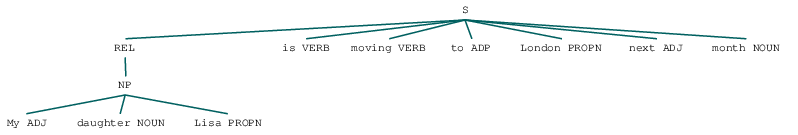

In [7]:
import nltk
import re
import spacy

from nltk.tokenize import word_tokenize
nlp = spacy.load('en')


grammar_en = r"""
            PP: {<PRON><VERB><DET>?<ADJ>?<NOUN>}
            NP: {<ADJ><ADJ>?<NOUN><PROPN>}            
            REL: {<PP>|<NP>}"""

relationship_list = ['father', 'mother', 'dad', 'daddy', 'mom', 'mommy', 'son', 'daughter', 'brother', 'sister',
                     'grandchild', 'grandson', 'granddaughter', 'grandfather', 'grandmother',
                     'grampa', 'grandpa', 'grandma', 'niece', 'nephew', 'uncle', 'aunt', 'cousin'
                                                                                         'brother-in-law',
                     'sister-in-law', 'husband', 'wife']
me_list = ['i', 'my']


def search_rel_type(sentence):
    for token in word_tokenize(sentence):
        if token.lower() in relationship_list:
            return token.lower()

    return None


def pos_tag_sentence(sentence):
    sentence = re.sub('\W+', ' ', sentence)
    doc = nlp(sentence)

    pos_tagged_sentence = []
    for token in doc:
        pos_tuple = (token.text, token.pos_)
        pos_tagged_sentence.append(pos_tuple)

    #print(pos_tagged_sentence)
    return pos_tagged_sentence


def chunk_sentence(pos_tagged_sentence):
    cp = nltk.RegexpParser(grammar_en)
    result = cp.parse(pos_tagged_sentence)
    #print(f'Chunk: {result}')
    cp.parse(pos_tagged_sentence)

    return result


def extract_rel(sentence):
    me = None

    relative = search_rel_type(sentence)
    if relative:
        chunk_tree = chunk_sentence(pos_tag_sentence(sentence))

        for i, sub_tree in enumerate(chunk_tree):
            if type(sub_tree) is nltk.tree.Tree and sub_tree.label() == 'REL':
                me = sub_tree[0][0][0]

    return me, relative



# EN
positive_text1_en = u'''My little sister'''
positive_text2_en = u'''I have an older brother'''
positive_text3_en = u'''My daughter Lisa lives in Berlin'''
positive_text4_en = u'''My daughter Lisa is moving to London next month.'''

negative_text1_en = u'''her brother'''
negative_text2_en = u'''his father John'''

result = chunk_sentence(pos_tag_sentence(positive_text4_en))
result